In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

customer_df = pd.read_csv("customerspends.csv")

customer_df

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.70
1,2,15.23,5.50
2,3,5.22,18.60
3,4,31.10,1.80
4,5,6.12,21.50
5,6,14.50,8.20
6,7,8.50,16.20
7,8,26.50,2.20
8,9,4.34,17.70
9,10,13.75,7.30


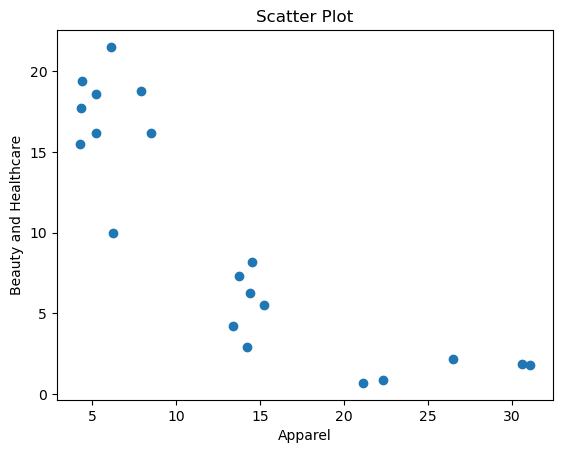

In [2]:
# Q1 

plt.scatter(customer_df['Apparel'], customer_df['Beauty and Healthcare'])

plt.xlabel('Apparel')
plt.ylabel('Beauty and Healthcare')
plt.title('Scatter Plot')

plt.show()

3 Clusters appear here

Q2. Normalize the features using StandardScaler and plot them in the scatter plot again

In [3]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_customer_df = scaler.fit_transform(customer_df[['Apparel', 'Beauty and Healthcare']])

scaled_customer_df[0:5]

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957]])

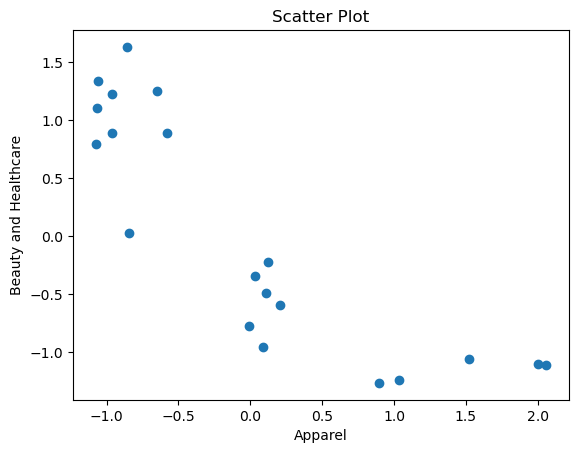

In [4]:
plt.scatter(scaled_customer_df[:,0], scaled_customer_df[:,1])

plt.xlabel('Apparel')
plt.ylabel('Beauty and Healthcare')
plt.title('Scatter Plot')

plt.show()

Q3. Use dendrogram and elbow method to verify if the number of clusters suggested is same as clusters visible in the scatter plot in Question 1

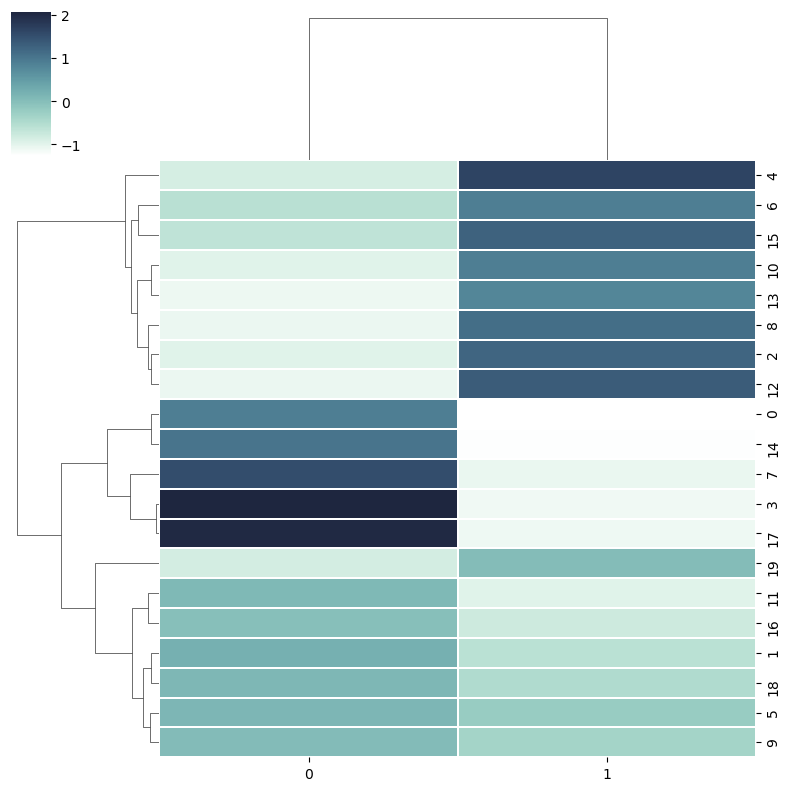

In [5]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_customer_df, cmap=cmap, linewidths=.2, figsize = (8,8))

C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

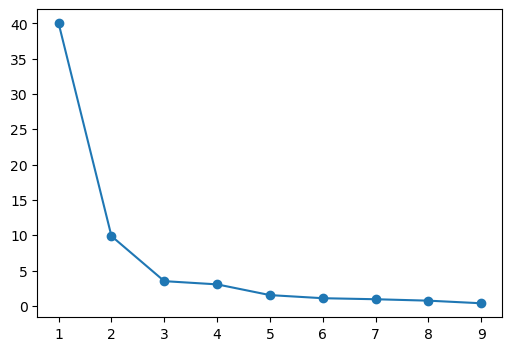

In [6]:
from sklearn.cluster import KMeans

cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init="auto")
    clusters.fit(scaled_customer_df)
    cluster_errors.append(clusters.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker = "o")

In [7]:
slope=[]
for i in range(0,8):
    slope.append(cluster_errors[i+1]-cluster_errors[i])
slope

[-30.118421289826063,
 -6.376151042819675,
 -0.45671192824131257,
 -1.5188535116680226,
 -0.43992226577216353,
 -0.14523880543928347,
 -0.20193277954786015,
 -0.3695364893687085]

Q4. Create the number of clusters as suggested by the elbow method using K-means algorithm.

Q5. Print the records of customersin each cluster and the cluster center of each clusterseparately. Explain the clusters intuitively

In [8]:
# Considering k=3
k = 3
clusters = KMeans(k, random_state=42, n_init="auto")
clusters.fit(scaled_customer_df)
customer_df["clusterid"] = clusters.labels_


C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# cluster 0
customer_df[customer_df.clusterid == 0]

,Customer,Apparel,Beauty and Healthcare,clusterid
2,3,5.22,18.60,0
4,5,6.12,21.50,0
6,7,8.50,16.20,0
8,9,4.34,17.70,0
10,11,5.20,16.20,0
12,13,4.40,19.40,0
13,14,4.25,15.50,0
15,16,7.90,18.80,0
19,20,6.25,9.98,0


In [10]:
# cluster 1
customer_df[customer_df.clusterid == 1]

,Customer,Apparel,Beauty and Healthcare,clusterid
0,1,21.1,0.7,1
3,4,31.1,1.8,1
7,8,26.5,2.2,1
14,15,22.3,0.9,1
17,18,30.6,1.9,1


In [11]:
# cluster 2
customer_df[customer_df.clusterid == 2]

,Customer,Apparel,Beauty and Healthcare,clusterid
1,2,15.23,5.50,2
5,6,14.50,8.20,2
9,10,13.75,7.30,2
11,12,14.20,2.90,2
16,17,13.40,4.20,2
18,19,14.40,6.28,2


In [12]:
cluster_centers = clusters.cluster_centers_

print("Cluster Centers:",cluster_centers)

Cluster Centers: [[-0.89566872  1.01899349]
 [ 1.50231949 -1.15535907]
 [ 0.09157017 -0.56569101]]


Hierarchical Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering
h_clusters = AgglomerativeClustering(3) 
h_clusters.fit(scaled_customer_df)
customer_df['h_clusterid'] = h_clusters.labels_


In [14]:
customer_df[customer_df.h_clusterid==0]

,Customer,Apparel,Beauty and Healthcare,clusterid,h_clusterid
1,2,15.23,5.50,2,0
5,6,14.50,8.20,2,0
9,10,13.75,7.30,2,0
11,12,14.20,2.90,2,0
16,17,13.40,4.20,2,0
18,19,14.40,6.28,2,0
19,20,6.25,9.98,0,0


In [15]:
customer_df[customer_df.h_clusterid==1]

,Customer,Apparel,Beauty and Healthcare,clusterid,h_clusterid
2,3,5.22,18.6,0,1
4,5,6.12,21.5,0,1
6,7,8.50,16.2,0,1
8,9,4.34,17.7,0,1
10,11,5.20,16.2,0,1
12,13,4.40,19.4,0,1
13,14,4.25,15.5,0,1
15,16,7.90,18.8,0,1


In [16]:
customer_df[customer_df.h_clusterid==2]

,Customer,Apparel,Beauty and Healthcare,clusterid,h_clusterid
0,1,21.1,0.7,1,2
3,4,31.1,1.8,1,2
7,8,26.5,2.2,1,2
14,15,22.3,0.9,1,2
17,18,30.6,1.9,1,2


Online Retail

In [19]:
online_retail_df = pd.read_excel("Online Retail.xlsx")
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Q6. Select only the transactions that have occurred in the year 06/01/11 and 11/30/11 and create a new subset of data. For answering questions from 7 to 10, use this subset of data.

In [20]:
# Q6
online_retail_df["date_transact"] = pd.to_datetime(online_retail_df["InvoiceDate"])
date_start = pd.to_datetime("2011-06-01")
date_end = pd.to_datetime("2011-11-30")

subset_df=online_retail_df[(online_retail_df['date_transact'] >= date_start) & (online_retail_df['date_transact'] <= date_end)]
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303901 entries, 209029 to 512929
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      303901 non-null  object        
 1   StockCode      303901 non-null  object        
 2   Description    303299 non-null  object        
 3   Quantity       303901 non-null  int64         
 4   InvoiceDate    303901 non-null  datetime64[ns]
 5   UnitPrice      303901 non-null  float64       
 6   CustomerID     237920 non-null  float64       
 7   Country        303901 non-null  object        
 8   date_transact  303901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [21]:
from datetime import datetime


end_date = datetime(2011, 11, 30)

data=subset_df


recency = data.groupby("CustomerID")["InvoiceDate"].max().reset_index()
recency["Recency"] = (end_date - recency["InvoiceDate"]).dt.days 

frequency = data.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
frequency.columns = ["CustomerID", "Frequency"]

data["TotalSpend"] = data["Quantity"] * data["UnitPrice"]
monetary = data.groupby("CustomerID")["TotalSpend"].sum().reset_index()
monetary.columns = ["CustomerID", "Monetary"]

rfm_data = recency.merge(frequency, on="CustomerID").merge(monetary, on="CustomerID")

# Display the RFM data for each customer
print(rfm_data)

      CustomerID         InvoiceDate  Recency  Frequency  Monetary
0        12347.0 2011-10-31 12:25:00       29          3   2261.75
1        12348.0 2011-09-25 13:13:00       65          1    310.00
2        12349.0 2011-11-21 09:51:00        8          1   1757.55
3        12352.0 2011-11-03 14:37:00       26          3    944.23
4        12356.0 2011-11-17 08:40:00       12          1     58.35
...          ...                 ...      ...        ...       ...
3487     18278.0 2011-09-27 11:58:00       63          1    173.90
3488     18281.0 2011-06-12 10:53:00      170          1     80.82
3489     18282.0 2011-08-09 15:10:00      112          2     98.76
3490     18283.0 2011-11-23 13:27:00        6          9   1128.22
3491     18287.0 2011-10-28 09:29:00       32          2   1072.00

[3492 rows x 5 columns]


C:\Users\dhruv\AppData\Local\Temp\ipykernel_19352\935405048.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["TotalSpend"] = data["Quantity"] * data["UnitPrice"]


C:\Users\dhruv\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


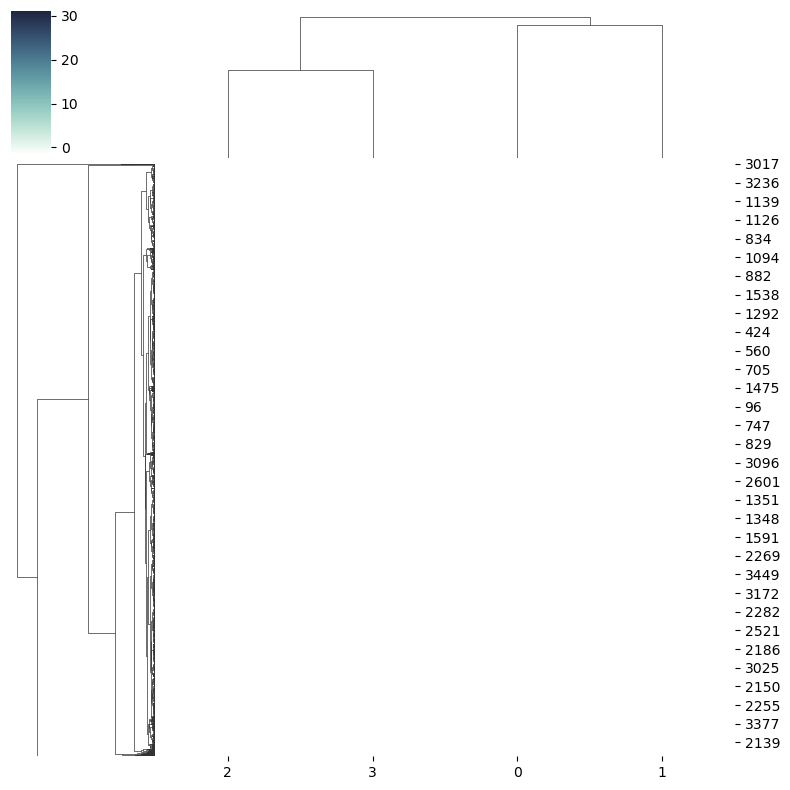

In [22]:
rfm_data = rfm_data.drop(["InvoiceDate"], axis=1)
scaler = StandardScaler()
X = rfm_data[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
scaled_rfm_df = scaler.fit_transform(X);
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap( scaled_rfm_df, cmap=cmap, linewidths=.2,
figsize = (8,8));

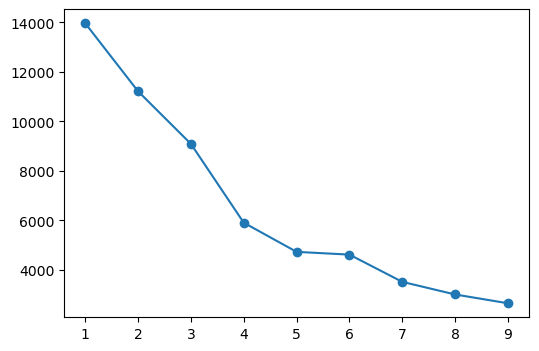

In [23]:
cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init="auto")
    clusters.fit(scaled_rfm_df)
    cluster_errors.append(clusters.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker = "o")

In [30]:
k = 4
scaled_rfm_df = pd.DataFrame(scaled_rfm_df)
clusters = KMeans(k, random_state=42, n_init="auto")
clusters.fit(scaled_rfm_df)
scaled_rfm_df["clusterid"] = clusters.labels_
scaled_rfm_df[scaled_rfm_df.clusterid == 0]

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.